In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 1: Load the data
df = pd.read_csv('/Users/iamshashidharbalachandragmail.com/Downloads/Learning/Python/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Step 2: Add an overweight column
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns=['BMI'], inplace=True)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [4]:
# Step 3: Normalize cholesterol and glucose
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [6]:
df['weight'] = df['weight'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   sex          70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
 13  overweight   70000 non-null  int64
dtypes: int64(14)
memory usage: 7.5 MB


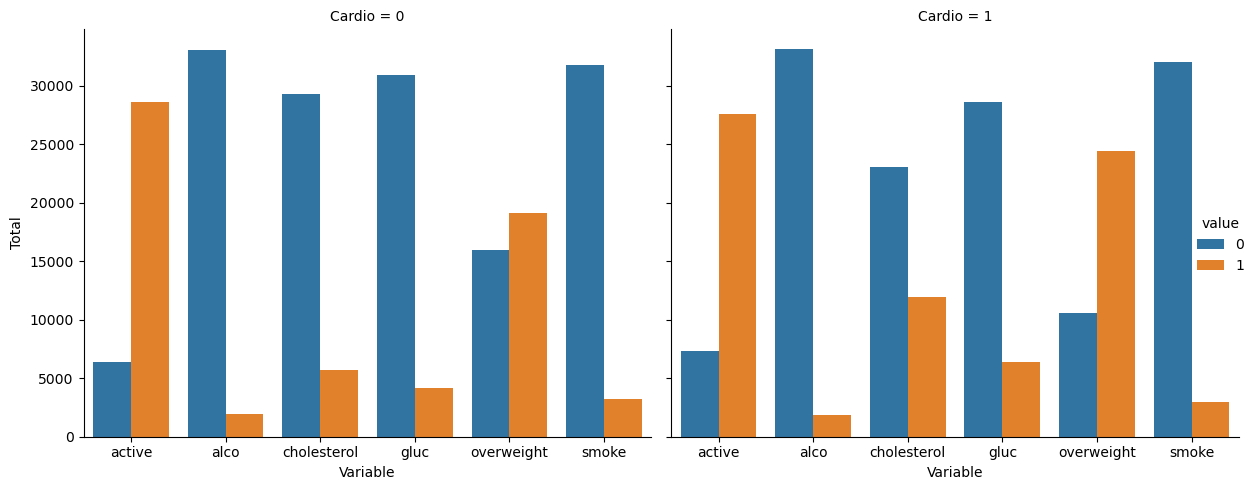

In [7]:
# Melt the DataFrame to long format for categorical plotting
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group by and count the occurrences of each variable
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

# Convert 'value' column to string type to avoid legend issue
df_cat['value'] = df_cat['value'].astype(str)

# Plotting the catplot
def draw_cat_plot():
    # Create the categorical plot
    g = sns.catplot(x='variable', y='total', hue='value', col='cardio', 
                    data=df_cat, kind='bar', height=5, aspect=1.2)
    
    # Set the axis labels and titles
    g.set_axis_labels("Variable", "Total")
    g.set_titles("Cardio = {col_name}")

    # Adjust layout for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()

    return g.fig

# Call the function to draw and display the plot
fig = draw_cat_plot()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


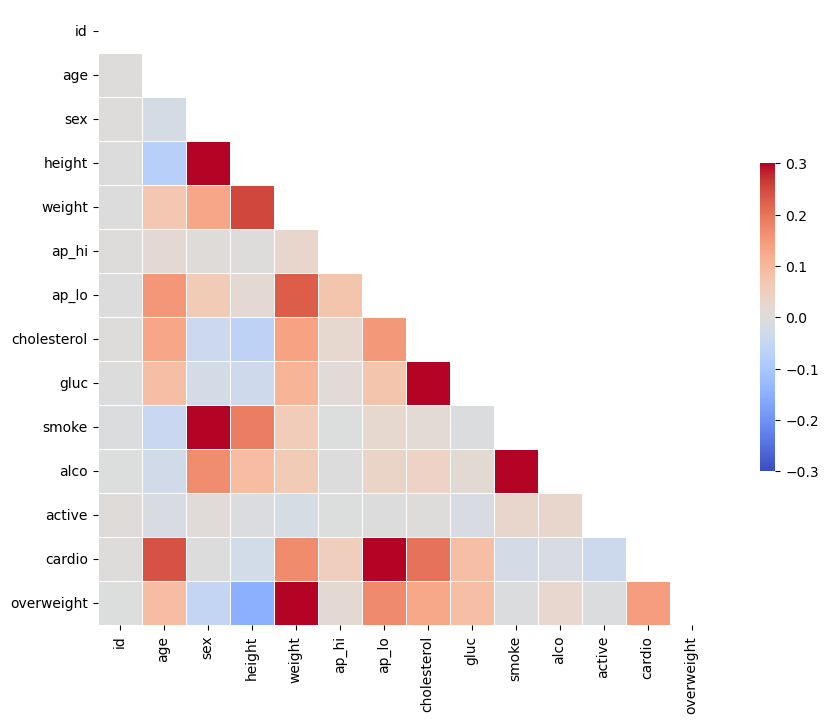

In [8]:
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &  # Remove illogical blood pressure values
        (df['height'] >= df['height'].quantile(0.025)) &  # Height >= 2.5th percentile
        (df['height'] <= df['height'].quantile(0.975)) &  # Height <= 97.5th percentile
        (df['weight'] >= df['weight'].quantile(0.025)) &  # Weight >= 2.5th percentile
        (df['weight'] <= df['weight'].quantile(0.975))    # Weight <= 97.5th percentile
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, cmap='coolwarm', vmax=0.3, vmin=-0.3, center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

    # Do not modify the next two lines
    plt.show()
    return fig

# Call the function to draw and display the heatmap
fig = draw_heat_map()